<a href="https://colab.research.google.com/github/imtiazazad/under_grade_suggestion_ML/blob/main/Correlation_Between_Personality_and_Undergraduate_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data(new1).csv') # Collected By me
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
sample = df.sample(5)
sample

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
13,9/12/2023 19:18,Sawda Muntaha,Female,20-22,Dhaka,"Reading, Music, Watching movies / TV series",0-5,sawda.muntaha@gmail.com,5,Science,A+,A+,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Math,A+,Engineering & Technology,Engineering & Technology,Islamic University of Technology,EEE,3rd year,Inspired by your passion or interest,No,3.25-3.49,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Neutral,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Neutral,Disagree,Disagree,Disagree,Disagree,Disagree,Neutral,Neutral,Agree,Agree,Strongly Agree,Neutral,Agree,Agree,Agree,Disagree,Agree,Agree,Neutral
15,9/12/2023 19:56,Md. Mustakim Perveg,Male,22 above,Rajshahi,"Sports, Reading, Cooking, Others",15-Nov,mustakimrifat07@gmail.com,4.0 -4.4,Science,A-,A-,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A,Engineering & Technology,Engineering & Technology,Varendra University,CSE,4th year,Influenced by current trends,Yes,3.5 -3.74,Sometimes,Disagree,Neutral,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Disagree,Strongly Disagree,Strongly Disagree,Neutral,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Agree,Strongly Agree
8,9/12/2023 17:33,Fahim Adnan,Male,22 above,Mymensingh,"Art/Craft, Music, Video games",0-5,fahimadnan310@gmail.com,2.5-2.9,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,A-,A-,B,B,History,A+,Arts & Humanities,Arts & Humanities,Abudharr Ghifari College,Economics,4th year,Guided by parents/guardian/relatives,Yes,Below 2.75,Yes,Disagree,Neutral,Agree,Agree,Strongly Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Strongly Agree
21,9/13/2023 23:26,Avijit Singha,Male,22 above,Dhaka,"Sports, Art/Craft, Music, Photography, Video g...",0-5,avijitjoy2000@gmail.com,3.5-3.9,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Biology,A+,Pure & Applied Sciences,Pure & Applied Sciences,Dhaka College,Statistics,3rd year,Guided by parents/guardian/relatives,Yes,3.25-3.49,Sometimes,Neutral,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Agree,Neutral,Neutral,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Neutral,Agree,Agree,Agree,Strongly Agree,Disagree,Agree,Agree,Agree
5,9/12/2023 16:15,Md. Zahidul Islam Kanon,Male,22 above,Rajshahi,"Reading, Video games",10-May,jahidulislamkanon003@gmail.com,5,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A+,Pure & Applied Sciences,Pure & Applied Sciences,MBSTU,Statistics,4th year,Guided by parents/guardian/relatives,Yes,3.5 -3.74,Sometimes,Strongly Disagree,Strongly Disagree,Neutral,Agree,Disagree,Neutral,Disagree,Agree,Neutral,Strongly Agree,Agree,Agree,Agree,Strongly Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Disagree,Neutral,Strongly Disagree,Neutral,Neutral,Neutral,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Disagree


In [ ]:
df.columns

Index(['Timestamp', 'Name', 'Gender', 'Age', 'Division', 'Hobby', 'STH_WeeklyAvg', 'Email', 'HSC_Gpa', 'HSC_Group', 'HSC_Grade_Math', 'HSC_Grade_Physics', 'HSC_Grade_Biology', 'HSC_Grade_Chemistry', 'HSC_Grade_Accounting', 'HSC_Grade_Economics', 'HSC_Grade_BOM', 'HSC_Grade_FBI', 'HSC_Grade_Logic', 'HSC_Grade_History', 'HSC_Grade_Sociology', 'HSC_Grade_Geography', 'HSC_Grade_ICT', 'Fvrt_Subject', 'Fvrt_Sub_Grade', 'Undergraduate_Sub_Wanted', 'Undergraduate_Sub', 'University Name', 'Undergraduate_Programm', 'Year_Studying', 'Program_Advisor', 'Satisfaction', 'Current_CGPA', 'Difficulty_Undergraduate', 'e1', 'e3', 'a1', 'a3', 'c1', 'c3', 'n1', 'n3', 'o1', 'e2', 'e4', 'a4', 'a2', 'c2', 'c4', 'n2', 'n4', 'o3', 'o2', 'o4', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13'], dtype='object')

- Openness: o1 + o2 + o3 + o4
- Conscientiousness: c1 + c2 + c3 + c4
- Extrovertness: e1 + e2 + e3 + e4
- Agreableness: a1 + a2 + a3 + a4
- Neuriticism: n1 + n2 + n3 + n4

In [ ]:
df['e1'].unique()

array(['Neutral', 'Strongly Agree', 'Disagree', 'Strongly Disagree',
       'Agree'], dtype=object)

In [ ]:
mapping  = {'Strongly Disagree':1, 'Disagree':2, 'Neutral':3, 'Agree':4, 'Strongly Agree':5}

In [ ]:
df.shape

(33, 67)

In [ ]:
df.columns.get_loc('e1')

34

In [ ]:
df.iloc[:, 32:] = df.iloc[:, 32:].replace(mapping)

In [ ]:
sample = df.sample(5)
sample

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
23,9/14/2023 0:26,Md. Ashraful Islam Emon,Male,20-22,Dhaka,"Sports, Video games, Watching movies / TV series",0-5,ashraful.emon752@outlook.com,5,Science,A+,A+,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Math,A,Engineering & Technology,Engineering & Technology,United International University,CSE,2nd year,Inspired by your passion or interest,Yes,Below 2.75,Sometimes,3,5,4,3,3,4,2,4,3,2,1,4,3,4,3,4,4,4,3,4,3,3,4,4,4,3,4,4,5,2,4,3,2
30,9/14/2023 11:11,MD ASHIKUR RAHMAN,Male,20-22,Khulna,Sports,0-5,mdasikur254@gmail.com,5,Science,A+,A+,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A+,Engineering & Technology,Engineering & Technology,Dhaka college,Statistics,1st year,Guided by parents/guardian/relatives,Yes,3.5 -3.74,Sometimes,2,2,3,3,3,3,2,2,3,3,3,2,3,2,3,3,3,2,3,3,2,2,3,3,3,3,3,3,3,2,2,3,2
5,9/12/2023 16:15,Md. Zahidul Islam Kanon,Male,22 above,Rajshahi,"Reading, Video games",10-May,jahidulislamkanon003@gmail.com,5,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A+,Pure & Applied Sciences,Pure & Applied Sciences,MBSTU,Statistics,4th year,Guided by parents/guardian/relatives,Yes,3.5 -3.74,Sometimes,1,1,3,4,2,3,2,4,3,5,4,4,4,1,2,3,3,3,3,2,2,2,3,1,3,3,3,4,5,4,5,4,2
16,9/13/2023 9:46,syedmahiyan,Male,20-22,Dhaka,"Sports, Watching movies / TV series",10-May,NaN,4.5 - 4.9,Science,A-,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A,Business Admisistration,Social Sciences,Open University,International Relation,3rd year,Influenced by current trends,No,3.00-3.24,Sometimes,4,2,3,4,3,4,2,1,4,4,2,4,5,4,1,4,4,4,4,2,4,3,4,4,3,4,4,4,4,2,4,2,4
18,9/13/2023 13:19,Saniyat Mushrat Lamim,Male,22 above,Chittagong,Video games,16+ hours,lamim.saniyat164@gmail.com,5,Science,A+,A+,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Biology,A,Engineering & Technology,Engineering & Technology,United International University,CSE,4th year,"Inspired by your passion or interest, Influenc...",Yes,3.75-4.00,No,5,5,4,3,5,4,4,4,5,4,4,4,4,1,1,3,4,3,4,1,5,4,5,4,3,5,4,5,4,4,4,1,1


- Openness: OPN
- Conscientiousness: CSN
- Extroversion: EXT
- Agreeableness: ARG
- Neuroticism: NT
- Intelligence: INT

In [ ]:
df['e2'] = 6-df['e2']
df['a2'] = 6-df['a2']
df['c2'] = 6-df['c2']
df['n2'] = 6-df['n2']
df['o2'] = 6-df['o2']
df['o3'] = 6-df['o3']
df['e4'] = 6-df['e4']
df['a4'] = 6-df['a4']
df['c4'] = 6-df['c4']
df['n4'] = 6-df['n4']
df['o4'] = 6-df['o4']

In [ ]:
df.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
0,9/12/2023 1:07,Mahabubar Rahman,Male,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,Science,A+,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4,1
1,9/12/2023 15:03,Shahnear Dipon,Male,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,Sometimes,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3,3
2,9/12/2023 15:08,Asif Mostafa Anik,Male,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,Science,A+,A+,Not Applicable,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,Sometimes,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2,1
3,9/12/2023 15:17,Abdur Rahman,Male,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,Commerce,NaN,NaN,NaN,NaN,A+,A,A+,A,NaN,NaN,NaN,NaN,A+,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,No,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1,2
4,9/12/2023 15:33,Habibul bashar,Male,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,Science,A+,A,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,Yes,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2,2


In [ ]:
df['OPN'] = df[['o1', 'o2', 'o3', 'o4']].sum(axis = 1)
df['CSN'] = df[['c1', 'c2', 'c3', 'c4']].sum(axis = 1)
df['EXT'] = df[['e1', 'e2', 'e3', 'e4']].sum(axis = 1)
df['ARG'] = df[['a1', 'a2', 'a3', 'a4']].sum(axis = 1)
df['NT'] = df[['n1', 'n2', 'n3', 'n4']].sum(axis = 1)
df['INT'] = df[['r1', 'r2', 'r3', 'r4','r5', 'r6', 'r7', 'r8','r9', 'r10', 'r11', 'r12', 'r13']].sum(axis = 1)

In [ ]:
df.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,Male,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,Science,A+,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,Male,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,Sometimes,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,Male,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,Science,A+,A+,Not Applicable,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,Sometimes,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,Male,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,Commerce,NaN,NaN,NaN,NaN,A+,A,A+,A,NaN,NaN,NaN,NaN,A+,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,No,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,Male,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,Science,A+,A,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,Yes,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2,2,16,17,8,13,14,46


In [ ]:
df.to_csv('final(new).csv', index = False)

In [ ]:
df1 = df.copy()

In [ ]:
df2 = pd.read_csv('/content/final(new).csv') # COLLECTED BY ME
df3 = pd.read_csv('/content/final(old).csv') # GIVEN
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df2.head(1)

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,Male,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,Science,A+,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4,1,15,15,10,14,11,49


In [ ]:
df3.head(1)

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,email,HSC_GPA,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_wanted,Undergraduate_Sub,University Name,Undergraduate_program,Year_Studying,Program_Advisor,Satisfication,Current_CGPA,Dificulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,2021/01/09 7:44:39 PM GMT+6,Atik Shahariar,Male,22 above,Chittagong Division,Sports;Music;Video games;Watching movies/ TV s...,11- 15 hours,atikshahariar15@gmail.com,5,Science,A+,A,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,physics,A,Engineering & Technology,Engineering & Technology,North South University,CSE,5th,Guided by parents/guardian/relatives,No,Below 2.75,Sometimes,3,3,5,4,3,1,3,3,1,3,3,4,3,1,2,3,1,3,3,5,3,2,5,4,3,4,3,2,4,3,5,2.0,1,12,7,12,16,10,41


In [ ]:
print(df2.shape)
print(df3.shape)

(33, 73)
(49, 73)


In [ ]:
print(df2.columns)

Index(['Timestamp', 'Name', 'Gender', 'Age', 'Division', 'Hobby', 'STH_WeeklyAvg', 'Email', 'HSC_Gpa', 'HSC_Group', 'HSC_Grade_Math', 'HSC_Grade_Physics', 'HSC_Grade_Biology', 'HSC_Grade_Chemistry', 'HSC_Grade_Accounting', 'HSC_Grade_Economics', 'HSC_Grade_BOM', 'HSC_Grade_FBI', 'HSC_Grade_Logic', 'HSC_Grade_History', 'HSC_Grade_Sociology', 'HSC_Grade_Geography', 'HSC_Grade_ICT', 'Fvrt_Subject', 'Fvrt_Sub_Grade', 'Undergraduate_Sub_Wanted', 'Undergraduate_Sub', 'University Name', 'Undergraduate_Programm', 'Year_Studying', 'Program_Advisor', 'Satisfaction', 'Current_CGPA', 'Difficulty_Undergraduate', 'e1', 'e3', 'a1', 'a3', 'c1', 'c3', 'n1', 'n3', 'o1', 'e2', 'e4', 'a4', 'a2', 'c2', 'c4', 'n2', 'n4', 'o3', 'o2', 'o4', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'OPN', 'CSN', 'EXT', 'ARG', 'NT', 'INT'], dtype='object')


In [ ]:
print(df3.columns)

Index(['Timestamp', 'Name', 'Gender', 'Age ', 'Division', 'Hobby', 'STH_WeeklyAvg', 'email', 'HSC_GPA', 'HSC_Group', 'HSC_Grade_Math', 'HSC_Grade_Physics', 'HSC_Grade_Biology', 'HSC_Grade_Chemistry', 'HSC_Grade_Accounting', 'HSC_Grade_Economics', 'HSC_Grade_BOM', 'HSC_Grade_FBI', 'HSC_Grade_Logic', 'HSC_Grade_History', 'HSC_Grade_Sociology', 'HSC_Grade_Geography', 'HSC_Grade_ICT', 'Fvrt_Subject', 'Fvrt_Sub_Grade', 'Undergraduate_Sub_wanted', 'Undergraduate_Sub', 'University Name', 'Undergraduate_program', 'Year_Studying', 'Program_Advisor', 'Satisfication', 'Current_CGPA', 'Dificulty_Undergraduate', 'e1', 'e3', 'a1', 'a3', 'c1', 'c3', 'n1', 'n3', 'o1', 'e2', 'e4', 'a4', 'a2', 'c2', 'c4', 'n2', 'n4', 'o3', 'o2', 'o4', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'OPN', 'CSN', 'EXT', 'ARG', 'NT', 'INT'], dtype='object')


In [ ]:
df3.rename(columns = { 'Age ':'Age','email':'Email', 'HSC_GPA':'HSC_Gpa','Undergraduate_Sub_wanted':'Undergraduate_Sub_Wanted', 'Undergraduate_program':'Undergraduate_Programm', 'Satisfication':'Satisfaction', 'Dificulty_Undergraduate':'Difficulty_Undergraduate'}, inplace = True)

In [ ]:
df2.columns

Index(['Timestamp', 'Name', 'Gender', 'Age', 'Division', 'Hobby', 'STH_WeeklyAvg', 'Email', 'HSC_Gpa', 'HSC_Group', 'HSC_Grade_Math', 'HSC_Grade_Physics', 'HSC_Grade_Biology', 'HSC_Grade_Chemistry', 'HSC_Grade_Accounting', 'HSC_Grade_Economics', 'HSC_Grade_BOM', 'HSC_Grade_FBI', 'HSC_Grade_Logic', 'HSC_Grade_History', 'HSC_Grade_Sociology', 'HSC_Grade_Geography', 'HSC_Grade_ICT', 'Fvrt_Subject', 'Fvrt_Sub_Grade', 'Undergraduate_Sub_Wanted', 'Undergraduate_Sub', 'University Name', 'Undergraduate_Programm', 'Year_Studying', 'Program_Advisor', 'Satisfaction', 'Current_CGPA', 'Difficulty_Undergraduate', 'e1', 'e3', 'a1', 'a3', 'c1', 'c3', 'n1', 'n3', 'o1', 'e2', 'e4', 'a4', 'a2', 'c2', 'c4', 'n2', 'n4', 'o3', 'o2', 'o4', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'OPN', 'CSN', 'EXT', 'ARG', 'NT', 'INT'], dtype='object')

In [ ]:
df3.columns

Index(['Timestamp', 'Name', 'Gender', 'Age', 'Division', 'Hobby', 'STH_WeeklyAvg', 'Email', 'HSC_Gpa', 'HSC_Group', 'HSC_Grade_Math', 'HSC_Grade_Physics', 'HSC_Grade_Biology', 'HSC_Grade_Chemistry', 'HSC_Grade_Accounting', 'HSC_Grade_Economics', 'HSC_Grade_BOM', 'HSC_Grade_FBI', 'HSC_Grade_Logic', 'HSC_Grade_History', 'HSC_Grade_Sociology', 'HSC_Grade_Geography', 'HSC_Grade_ICT', 'Fvrt_Subject', 'Fvrt_Sub_Grade', 'Undergraduate_Sub_Wanted', 'Undergraduate_Sub', 'University Name', 'Undergraduate_Programm', 'Year_Studying', 'Program_Advisor', 'Satisfaction', 'Current_CGPA', 'Difficulty_Undergraduate', 'e1', 'e3', 'a1', 'a3', 'c1', 'c3', 'n1', 'n3', 'o1', 'e2', 'e4', 'a4', 'a2', 'c2', 'c4', 'n2', 'n4', 'o3', 'o2', 'o4', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'OPN', 'CSN', 'EXT', 'ARG', 'NT', 'INT'], dtype='object')

In [ ]:
x = set(df2.columns)
y = set(df3.columns)

In [ ]:
similarity = x.intersection(y)

In [ ]:
print(len(similarity))

73


In [ ]:
final_df = pd.concat([df2, df3], axis = 0)
final_df.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,Male,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,Science,A+,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,Male,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,Sometimes,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,Male,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,Science,A+,A+,Not Applicable,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,Sometimes,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,Male,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,Commerce,NaN,NaN,NaN,NaN,A+,A,A+,A,NaN,NaN,NaN,NaN,A+,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,No,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,Male,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,Science,A+,A,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,Yes,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
final_df.shape

(82, 73)

In [ ]:
final_df.to_csv('final_df.csv')

In [ ]:
# final_df.dtypes


In [ ]:
final_df['HSC_Group'].unique()

array(['Science', 'Commerce', 'Arts'], dtype=object)

In [ ]:
clean_up={'HSC_Group':{'Science':2, 'Commerce':1, 'Arts':0 }}

In [ ]:
dff=final_df.replace(clean_up)

In [ ]:
dff['HSC_Group'].unique()

array([2, 1, 0])

In [ ]:
df.columns.get_loc('HSC_Grade_Math')

10

In [ ]:
df.columns.get_loc('HSC_Grade_ICT')

22

In [ ]:
final_df['HSC_Grade_Geography'].unique()

array([nan, 'B', 'Not Applicable', 'A-'], dtype=object)

In [ ]:
clean={'A':4, 'Not Applicable':0, np.nan:0, 'A+':5, 'A-':3, 'B':2, 'Not applicable':0}

In [ ]:
dff.iloc[:, 10:23]=dff.iloc[:, 10:23].replace(clean)

In [ ]:
# dff.iloc[:, 10:23]

In [ ]:
# dff.reset_index().head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
L_encoder= LabelEncoder()
dff['Gender']=L_encoder.fit_transform(dff['Gender'])

In [ ]:
dff.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,1,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,1,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,Sometimes,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,1,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,Sometimes,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,1,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,No,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,1,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,Yes,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
dff['Difficulty_Undergraduate'].unique()

array(['Yes', 'Sometimes', 'No'], dtype=object)

In [ ]:
clean_up = {'Yes':2, 'Sometimes':1, 'No':0}
dff['Difficulty_Undergraduate'] = dff['Difficulty_Undergraduate'].replace(clean_up)

In [ ]:
dff.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,1,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,1,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,1,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,1,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,1,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
clean_up = {'A':4, 'Not Applicable':0, np.nan:0, 'A+':5, 'A-':3, 'B':2}

In [ ]:
dff['Fvrt_Sub_Grade'] = dff['Fvrt_Sub_Grade'].replace(clean_up)

In [ ]:
dff['Fvrt_Sub_Grade'].unique()

array([4, 5, 3])

In [ ]:
dff.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,1,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,4,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,1,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,5,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,1,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,4,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,1,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,4,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,1,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,5,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
dff['Satisfaction'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
clean_up = {'No':0, 'Yes':1}

In [ ]:
dff['Satisfaction'] = dff['Satisfaction'].replace(clean_up)

In [ ]:
dff['Satisfaction'].unique()

array([0, 1])

In [ ]:
df.head()

,Timestamp,Name,Gender,Age,Division,Hobby,STH_WeeklyAvg,Email,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,9/12/2023 1:07,Mahabubar Rahman,Male,22 above,Rangpur,"Sports, Music, Watching movies / TV series",0-5,mahbubrng1996@gmail.com,4.5 - 4.9,Science,A+,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Chemistry,A,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,No,Below 2.75,Yes,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4,1,15,15,10,14,11,49
1,9/12/2023 15:03,Shahnear Dipon,Male,22 above,Dhaka,"Music, Watching movies / TV series",0-5,shdipon7@gmail.com,4.5 - 4.9,Science,A+,A+,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Physics,A+,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",Yes,3.00-3.25,Sometimes,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3,3,19,14,16,14,7,43
2,9/12/2023 15:08,Asif Mostafa Anik,Male,22 above,Dhaka,"Sports, Reading, Music",10-May,a.m.aanikce@gmail.com,5,Science,A+,A+,Not Applicable,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,Physics,A,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,Yes,3.5 -3.74,Sometimes,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2,1,12,17,8,15,13,43
3,9/12/2023 15:17,Abdur Rahman,Male,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",10-May,thh1138@gmail.com,4.0 -4.4,Commerce,NaN,NaN,NaN,NaN,A+,A,A+,A,NaN,NaN,NaN,NaN,A+,Accounting,A,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,Yes,3.00-3.25,No,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1,2,17,14,14,12,14,43
4,9/12/2023 15:33,Habibul bashar,Male,20-22,Rajshahi,"Reading, Watching movies / TV series",10-May,mdhabibulbasher125@gmail.com,5,Science,A+,A,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Biology,A+,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,No,3.5 -3.74,Yes,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2,2,16,17,8,13,14,46


In [ ]:
col_drop=['Timestamp', 'Name','Email', 'STH_WeeklyAvg']
dff.drop(columns=col_drop, inplace=True)
dff.head(5)

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,22 above,Rangpur,"Sports, Music, Watching movies / TV series",4.5 - 4.9,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,4,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,0,Below 2.75,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,22 above,Dhaka,"Music, Watching movies / TV series",4.5 - 4.9,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,5,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3.00-3.25,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,22 above,Dhaka,"Sports, Reading, Music",5,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,4,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,1,3.5 -3.74,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,22 above,Dhaka,"Reading, Music, Video games, Watching movies /...",4.0 -4.4,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,4,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,1,3.00-3.25,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,20-22,Rajshahi,"Reading, Watching movies / TV series",5,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,5,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,0,3.5 -3.74,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
dff['Hobby']=L_encoder.fit_transform(dff['Hobby'])

In [ ]:
dff['Hobby'].unique()

array([37,  9, 39, 19, 24, 22,  5, 23,  2, 40,  8, 10, 15, 20, 34, 38, 43,
       44, 65, 18, 35,  3, 42, 68, 21,  1,  7, 41, 36, 66, 46, 45, 49, 25,
       48, 54, 31, 29, 62,  0, 26, 30, 28, 59, 17, 14,  4, 27, 50, 16, 61,
       52, 69, 51, 33, 11, 32, 67, 63, 56, 55, 12, 47, 64, 60,  6, 58, 13,
       53, 57])

In [ ]:
encoded_gpa = {'4.5 - 4.9':6, '5':7, '4.0 -4.4':5, '2.5-2.9':2, '3.5-3.9':4, '4.5- 4.9':6,'4.0- 4.4':5, '3.5 - 3.9':4}

In [ ]:
dff['HSC_Gpa'] = dff['HSC_Gpa'].replace(encoded_gpa)

In [ ]:
dff['HSC_Gpa'].unique()

array([6, 7, 5, 2, 4])

In [ ]:
sample = dff.sample(5)

In [ ]:
sample

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
20,0,22 above,Khulna Division,4,7,0,0,0,0,0,0,0,0,0,5,5,0,0,5,Ict and economics,5,Law,Arts & Humanities,University of Dhaka,Department of Linguistics,3rd,Inspired by friends,1,3.00- 3.25,2,5,4,3,4,4,5,4,2,4,4,2,1,2,5,5,2,2,4,4,4,5,2,4,4,4,4,4,4,3,2,3,4.0,2,16,19,15,10,10,45
21,0,18-20,Chittagong Division,27,6,1,0,0,0,0,4,0,5,5,0,0,0,0,5,Accounting,4,Business Studies,Arts & Humanities,University of Dhaka,Linguistics,3rd,Influenced by current trends,0,3.25- 3.4,2,1,2,3,3,2,3,4,4,4,2,2,3,2,4,3,4,4,3,3,4,2,3,4,3,3,2,2,1,4,4,4,3.0,3,14,12,7,11,16,38
16,0,16-18,Khulna Division,26,7,2,5,5,5,5,0,0,0,0,0,0,0,0,5,Math,5,Engineering & Technology,Engineering & Technology,BUET,EEE,NaN,Inspired by your passion or interest;Guided by...,1,4.00 - 3.75,2,5,5,4,5,5,4,3,4,4,5,5,4,3,4,3,4,3,4,4,3,3,5,4,4,4,5,4,4,5,3,5,3.0,3,15,16,20,16,14,52
22,0,22 above,Chittagong,3,6,2,5,4,4,4,0,0,0,0,0,0,0,0,4,Math,5,Medicine & Health Science,Medicine & Health Science,"University of science and technology, IAHS",Medical,5th year,Guided by parents/guardian/relatives,1,2.75 - 2.99,1,2,4,4,4,3,4,4,2,4,5,3,2,2,3,4,3,4,2,3,4,3,3,3,3,2,3,3,4,4,4,4,5.0,5,13,14,14,12,13,46
8,1,22 above,Mymensingh,2,2,0,0,0,0,0,0,0,0,0,2,3,3,2,2,History,5,Arts & Humanities,Arts & Humanities,Abudharr Ghifari College,Economics,4th year,Guided by parents/guardian/relatives,1,Below 2.75,2,2,3,4,4,1,4,4,1,5,2,2,2,2,4,4,2,4,2,2,4,4,4,4,3,4,4,4,4,4,2,2,2.0,5,13,13,9,12,11,46


In [ ]:
dff['Current_CGPA'].unique()

array(['Below 2.75', '3.00-3.25', '3.5 -3.74', '3.00-3.24', '3.25-3.49',
       '2.75 - 2.99', '3.75-4.00', '3.5- 3.74', '4.00 - 3.75', nan,
       '3.25- 3.4', '2.75-2.9', '3.00- 3.25'], dtype=object)

In [ ]:
encoded_current_cgpa = {'Below 2.75':1, '3.00-3.25':3, '3.5 -3.74':5, '3.00-3.24':3, '3.25-3.49':4,'2.75 - 2.99':2, '3.75-4.00':6, '3.5- 3.74':5, '4.00 - 3.75':6, np.nan:0,'3.25- 3.4':4, '2.75-2.9':2, '3.00- 3.25':3}

In [ ]:
dff['Current_CGPA'] = dff['Current_CGPA'].replace(encoded_current_cgpa)

In [ ]:
dff['Current_CGPA'].unique()

array([1, 3, 5, 4, 2, 6, 0])

In [ ]:
dff.sample()

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
22,1,22 above,Chittagong Division,50,6,2,4,4,4,5,0,0,0,0,0,0,0,0,5,English,5,Engineering & Technology,Arts & Humanities,University of Dhaka.,Linguistics,3rd,Inspired by your passion or interest,0,4,2,3,2,4,4,3,4,4,3,5,2,2,2,2,4,3,2,3,3,3,5,4,3,4,4,3,4,4,5,4,2,4,2.0,2,16,14,9,12,12,45


In [ ]:
df_last = dff.copy()

In [ ]:
df_last.head()

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,HSC_Grade_Math,HSC_Grade_Physics,HSC_Grade_Biology,HSC_Grade_Chemistry,HSC_Grade_Accounting,HSC_Grade_Economics,HSC_Grade_BOM,HSC_Grade_FBI,HSC_Grade_Logic,HSC_Grade_History,HSC_Grade_Sociology,HSC_Grade_Geography,HSC_Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Undergraduate_Sub,University Name,Undergraduate_Programm,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,22 above,Rangpur,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,4,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,22 above,Dhaka,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,5,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,22 above,Dhaka,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,4,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,22 above,Dhaka,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,4,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,20-22,Rajshahi,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,5,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
col_mapping = {
                  'HSC_Grade_Math': 'Grade_Math',
                  'HSC_Grade_Physics': 'Grade_Phy',
                  'HSC_Grade_Biology': 'Grade_Bio',
                  'HSC_Grade_Chemistry': 'Grade_Chem',
                  'HSC_Grade_Accounting': 'Grade_Acc',
                  'HSC_Grade_Economics': 'Grade_Eco',
                  'HSC_Grade_BOM': 'Grade_Bom',
                  'HSC_Grade_FBI': 'Grade_FBI',
                  'HSC_Grade_Logic': 'Grade_Log',
                  'HSC_Grade_History': 'Grade_Hist',
                  'HSC_Grade_Sociology': 'Grade_Socio',
                  'HSC_Grade_Geography': 'Grade_Geo',
                  'HSC_Grade_ICT': 'Grade_ICT',
                  'University Name': 'Name_Uni',
                  'Undergraduate_Programm': 'Prog_Undergrad',
                  'Undergraduate_Sub': 'Sub_Undergrad'

                  }

# Using the rename method to change column names
df_last.rename(columns=col_mapping, inplace=True)

In [ ]:
df_last.sample()

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Name_Uni,Prog_Undergrad,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,22 above,Chittagong Division,46,7,2,5,4,5,5,0,0,0,0,0,0,0,0,0,physics,4,Engineering & Technology,Engineering & Technology,North South University,CSE,5th,Guided by parents/guardian/relatives,0,1,1,3,3,5,4,3,1,3,3,1,3,3,4,3,1,2,3,1,3,3,5,3,2,5,4,3,4,3,2,4,3,5,2.0,1,12,7,12,16,10,41


In [ ]:
df_last['Age'].unique()

array(['22 above', '20-22', '18-20', '16-18'], dtype=object)

In [ ]:
df_last['Age']=L_encoder.fit_transform(df_last['Age'])

In [ ]:
df_last['Age'].unique()

array([3, 2, 1, 0])

In [ ]:
df_last.head()

,Gender,Age,Division,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Name_Uni,Prog_Undergrad,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,Rangpur,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,4,Engineering & Technology,Pure & Applied Sciences,University of Dhaka,Statistics,4th year,Guided by parents/guardian/relatives,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,Dhaka,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,5,Engineering & Technology,Engineering & Technology,EWU,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,Dhaka,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,4,Engineering & Technology,Engineering & Technology,Rajshahi University of Engineering and Technology,CE,4th year,Inspired by your passion or interest,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,Dhaka,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,4,Business Admisistration,Business Administration,National University,Marketing,4th year,Inspired by your passion or interest,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,Rajshahi,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,5,Engineering & Technology,Pure & Applied Sciences,Dhaka college,Statistics,3rd year,Inspired by your passion or interest,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
df_last['Sub_Undergrad'].unique()

array(['Pure & Applied Sciences', 'Engineering & Technology',
       'Business Administration', 'Arts & Humanities', 'Social Sciences',
       'Medicine & Health Science',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)',
       'Law',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)',
       nan], dtype=object)

In [ ]:
# df_last.to_csv('final_data.csv', index = False)

In [ ]:
drop_col=['Division', 'Name_Uni']
df_last.drop(columns=drop_col, inplace=True)
df_last.head(5)

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Prog_Undergrad,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,Chemistry,4,Engineering & Technology,Pure & Applied Sciences,Statistics,4th year,Guided by parents/guardian/relatives,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,Physics,5,Engineering & Technology,Engineering & Technology,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,Physics,4,Engineering & Technology,Engineering & Technology,CE,4th year,Inspired by your passion or interest,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,Accounting,4,Business Admisistration,Business Administration,Marketing,4th year,Inspired by your passion or interest,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,Biology,5,Engineering & Technology,Pure & Applied Sciences,Statistics,3rd year,Inspired by your passion or interest,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
df_last['Fvrt_Subject']=L_encoder.fit_transform(df_last['Fvrt_Subject'])

In [ ]:
df_last.head()

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Prog_Undergrad,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,6,4,Engineering & Technology,Pure & Applied Sciences,Statistics,4th year,Guided by parents/guardian/relatives,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,24,5,Engineering & Technology,Engineering & Technology,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,24,4,Engineering & Technology,Engineering & Technology,CE,4th year,Inspired by your passion or interest,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,0,4,Business Admisistration,Business Administration,Marketing,4th year,Inspired by your passion or interest,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,2,5,Engineering & Technology,Pure & Applied Sciences,Statistics,3rd year,Inspired by your passion or interest,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
df_last.head()

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Prog_Undergrad,Year_Studying,Program_Advisor,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,6,4,Engineering & Technology,Pure & Applied Sciences,Statistics,4th year,Guided by parents/guardian/relatives,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,24,5,Engineering & Technology,Engineering & Technology,CSE,4th year,"Inspired by your passion or interest, Inspired...",1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,24,4,Engineering & Technology,Engineering & Technology,CE,4th year,Inspired by your passion or interest,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,0,4,Business Admisistration,Business Administration,Marketing,4th year,Inspired by your passion or interest,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,2,5,Engineering & Technology,Pure & Applied Sciences,Statistics,3rd year,Inspired by your passion or interest,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
df_last.drop(columns = 'Program_Advisor', inplace = True)

In [ ]:
df_last.drop(columns = 'Year_Studying', inplace = True)

In [ ]:
df_last.head()

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Prog_Undergrad,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,6,4,Engineering & Technology,Pure & Applied Sciences,Statistics,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,24,5,Engineering & Technology,Engineering & Technology,CSE,1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,24,4,Engineering & Technology,Engineering & Technology,CE,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,0,4,Business Admisistration,Business Administration,Marketing,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,2,5,Engineering & Technology,Pure & Applied Sciences,Statistics,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
df_last['Undergraduate_Sub_Wanted'].unique()

array(['Engineering & Technology', 'Business Admisistration',
       'Pure & Applied Sciences', 'Arts & Humanities',
       'Medicine & Health Science',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)',
       'Law',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)',
       'Business Studies', 'Business Administration'], dtype=object)

In [ ]:
df_last['Sub_Undergrad'].unique()

array(['Pure & Applied Sciences', 'Engineering & Technology',
       'Business Administration', 'Arts & Humanities', 'Social Sciences',
       'Medicine & Health Science',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)',
       'Law',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)',
       nan], dtype=object)

In [ ]:
#df_last.to_csv('train_test.csv')

In [ ]:
train_test = pd.read_csv('/content/train_test.csv')

In [ ]:
train_test.head()

,Unnamed: 0,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Prog_Undergrad,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,6,4,Engineering & Technology,Pure & Applied Sciences,Statistics,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,24,5,Engineering & Technology,Engineering & Technology,CSE,1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,24,4,Engineering & Technology,Engineering & Technology,CE,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,0,4,Business Admisistration,Business Administration,Marketing,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,2,5,Engineering & Technology,Pure & Applied Sciences,Statistics,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
train_test.drop(columns = 'Prog_Undergrad', inplace = True)

In [ ]:
train_test['Undergraduate_Sub_Wanted'].unique()

array(['Engineering & Technology', 'Business Admisistration',
       'Pure & Applied Sciences', 'Arts & Humanities',
       'Medicine & Health Science',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)',
       'Law',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)',
       'Business Studies', 'Business Administration'], dtype=object)

In [ ]:
encoded_wanted_sub = {
       'Engineering & Technology':'a',
       'Business Admisistration':'f',
       'Pure & Applied Sciences':'c',
       'Arts & Humanities':'b',
       'Medicine & Health Science':'i',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)':'d',
       'Law':'g',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)':'d',
       'Business Studies':'h',
       'Business Administration':'f'}

In [ ]:
train_test['Undergraduate_Sub_Wanted'] = train_test['Undergraduate_Sub_Wanted'].replace(encoded_wanted_sub)

In [ ]:
train_test['Undergraduate_Sub_Wanted'].unique()

array(['a', 'f', 'c', 'b', 'i', 'd', 'g', 'h'], dtype=object)

In [ ]:
train_test['Sub_Undergrad'].unique()

array(['Pure & Applied Sciences', 'Engineering & Technology',
       'Business Administration', 'Arts & Humanities', 'Social Sciences',
       'Medicine & Health Science',
       'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)',
       'Law',
       'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)'],
      dtype=object)

In [ ]:
encoded_sub_undergrad = {
    'Pure & Applied Sciences':'c',
    'Engineering & Technology':'a',
    'Business Administration':'f',
    'Arts & Humanities':'b',
    'Social Sciences':'e',
    'Medicine & Health Science':'i',
    'Biological Sciences/Life Sciences (includes Agriculture, Soil / water)':'d',
    'Law':'g',
    'Biological Sciences/ Life Sciences (includes Agriculture, Soil/water)':'d'}

In [ ]:
train_test['Sub_Undergrad'] = train_test['Sub_Undergrad'].replace(encoded_sub_undergrad)

In [ ]:
train_test['Sub_Undergrad'].unique()

array(['c', 'a', 'f', 'b', 'e', 'i', 'd', 'g'], dtype=object)

In [ ]:
train_test.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
train_test.head()

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Sub_Undergrad,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1,3,37,6,2,5,4,4,4,0,0,0,0,0,0,0,0,5,6,4,a,c,0,1,2,3,2,4,5,5,5,4,2,4,2,3,3,2,2,3,3,2,4,2,5,4,5,5,4,4,3,4,5,4,3,3,4.0,1,15,15,10,14,11,49
1,1,3,9,6,2,5,5,4,4,0,0,0,0,0,0,0,0,4,24,5,a,a,1,3,1,5,4,3,4,4,4,1,1,5,3,4,4,3,3,3,1,4,5,4,5,3,3,3,4,4,3,3,4,5,1,4,3.0,3,19,14,16,14,7,43
2,1,3,39,7,2,5,5,0,5,0,0,0,0,0,0,0,0,5,24,4,a,a,1,5,1,2,1,5,5,4,5,4,1,1,4,1,1,4,4,4,3,5,4,2,5,3,3,5,5,4,3,5,5,5,1,1,2.0,1,12,17,8,15,13,43
3,1,3,19,5,1,0,0,0,0,5,4,5,4,0,0,0,0,5,0,4,f,f,1,3,0,3,4,3,3,3,4,4,4,4,3,4,3,3,3,4,3,3,4,4,5,4,3,4,3,3,4,4,3,4,4,4,1.0,2,17,14,14,12,14,43
4,1,2,24,7,2,5,4,5,5,0,0,0,0,0,0,0,0,4,2,5,a,c,0,5,2,3,2,5,5,3,5,2,4,4,1,2,2,1,5,4,4,4,4,4,4,4,3,4,4,3,4,5,5,4,2,4,2.0,2,16,17,8,13,14,46


In [ ]:
# train_test.to_csv('whatsnext.csv', index = False)

In [ ]:
train_test['Sub_Undergrad'].unique()

array(['c', 'a', 'f', 'b', 'e', 'i', 'd', 'g'], dtype=object)

In [ ]:
train_test['Undergraduate_Sub_Wanted'].unique()

array(['a', 'f', 'c', 'b', 'i', 'd', 'g', 'h'], dtype=object)

In [ ]:
en={'Sub_Undergrad':{'c':3, 'a':1, 'f':6, 'b':2, 'e':5, 'i':9, 'd':4, 'g':7},
   'Undergraduate_Sub_Wanted':{'a':1, 'f':6, 'c':3, 'b':2, 'i':9, 'd':4, 'g':7, 'h':8}
   }

In [ ]:
train_test = train_test.replace(en)

In [ ]:
train_test['Undergraduate_Sub_Wanted'].unique()

array([1, 6, 3, 2, 9, 4, 7, 8])

In [ ]:
train_test['Sub_Undergrad'].unique()

array([3, 1, 6, 2, 5, 9, 4, 7])

In [ ]:
t1=train_test.dropna()

In [ ]:
t1.shape

(81, 64)

In [ ]:
X=t1.copy()
y=t1['Sub_Undergrad']
X=X.drop(columns=['Sub_Undergrad'])

In [ ]:
y.shape

(81,)

In [ ]:
X.shape

(81, 63)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_copy = X.copy()
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
X_scaled.head()

,Gender,Age,Hobby,HSC_Gpa,HSC_Group,Grade_Math,Grade_Phy,Grade_Bio,Grade_Chem,Grade_Acc,Grade_Eco,Grade_Bom,Grade_FBI,Grade_Log,Grade_Hist,Grade_Socio,Grade_Geo,Grade_ICT,Fvrt_Subject,Fvrt_Sub_Grade,Undergraduate_Sub_Wanted,Satisfaction,Current_CGPA,Difficulty_Undergraduate,e1,e3,a1,a3,c1,c3,n1,n3,o1,e2,e4,a4,a2,c2,c4,n2,n4,o3,o2,o4,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,OPN,CSN,EXT,ARG,NT,INT
0,1.0,1.000000,0.536232,0.8,1.0,1.0,0.8,0.8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.193548,0.5,0.000,0.0,0.166667,1.0,0.50,0.25,0.5,1.00,1.00,1.00,0.75,0.25,0.75,0.25,0.50,0.50,0.25,0.25,0.50,0.50,0.25,0.75,0.25,1.00,0.75,1.0,1.000000,0.75,0.75,0.50,0.75,1.00,0.666667,0.50,0.50,0.75,0.00,0.615385,0.615385,0.375,0.6,0.416667,0.823529
1,1.0,1.000000,0.130435,0.8,1.0,1.0,1.0,0.8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.774194,1.0,0.000,1.0,0.500000,0.5,1.00,0.75,0.0,0.75,0.75,0.75,0.00,0.00,1.00,0.50,0.75,0.75,0.50,0.50,0.50,0.00,0.75,1.00,0.75,1.00,0.50,0.5,0.333333,0.75,0.75,0.50,0.50,0.75,1.000000,0.00,0.75,0.50,0.50,0.923077,0.538462,0.750,0.6,0.083333,0.647059
2,1.0,1.000000,0.565217,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.774194,0.5,0.000,1.0,0.833333,0.5,0.25,0.00,1.0,1.00,0.75,1.00,0.75,0.00,0.00,0.75,0.00,0.00,0.75,0.75,0.75,0.50,1.00,0.75,0.25,1.00,0.50,0.5,1.000000,1.00,0.75,0.50,1.00,1.00,1.000000,0.00,0.00,0.25,0.00,0.384615,0.769231,0.250,0.7,0.583333,0.647059
3,1.0,1.000000,0.275362,0.6,0.5,0.0,0.0,0.0,0.0,1.0,0.8,1.0,0.8,0.0,0.0,0.0,0.0,1.0,0.000000,0.5,0.625,1.0,0.500000,0.0,0.50,0.75,0.0,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.75,1.00,0.75,0.5,0.666667,0.50,0.50,0.75,0.75,0.50,0.666667,0.75,0.75,0.00,0.25,0.769231,0.538462,0.625,0.4,0.666667,0.647059
4,1.0,0.666667,0.347826,1.0,1.0,1.0,0.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.064516,1.0,0.000,0.0,0.833333,1.0,0.50,0.25,1.0,1.00,0.50,1.00,0.25,0.75,0.75,0.00,0.25,0.25,0.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.5,0.666667,0.75,0.50,0.75,1.00,1.00,0.666667,0.25,0.75,0.25,0.25,0.692308,0.769231,0.250,0.5,0.666667,0.735294


train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 123)

In [ ]:
X_train.shape

(64, 63)

In [ ]:
y_train.shape

(64,)

In [ ]:
y_train.unique()

array([1, 9, 3, 2, 5, 6, 7, 4])

In [ ]:
y_test.unique()

array([1, 3, 4, 2])

decision_tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy = accuracy_score(y_test, y_pred)

labels = np.unique(y)
confusion =  confusion_matrix(y_test, y_pred, labels=labels)
# Create a confusion matrix


# Print the accuracy


Accuracy of Decision Tree classifier: 58.82%


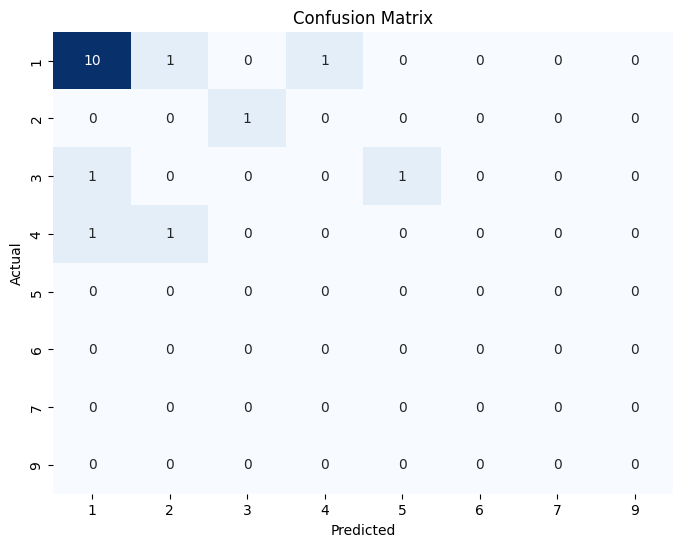

In [ ]:
print(f'Accuracy of Decision Tree classifier: {accuracy * 100:.2f}%')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0

    accuracy                           0.59        17
   macro avg       0.17      0.17      0.17        17
weighted avg       0.59      0.59      0.59        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(decision_tree, X, y, cv=5)

# Print the cross-validation accuracy for each fold and the mean
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')


Cross-validation scores: [0.47058824 0.5625     0.5625     0.25       0.3125    ]
Mean cross-validation accuracy: 0.43


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random forrest

Accuracy of Random Forest classifier: 76.47%


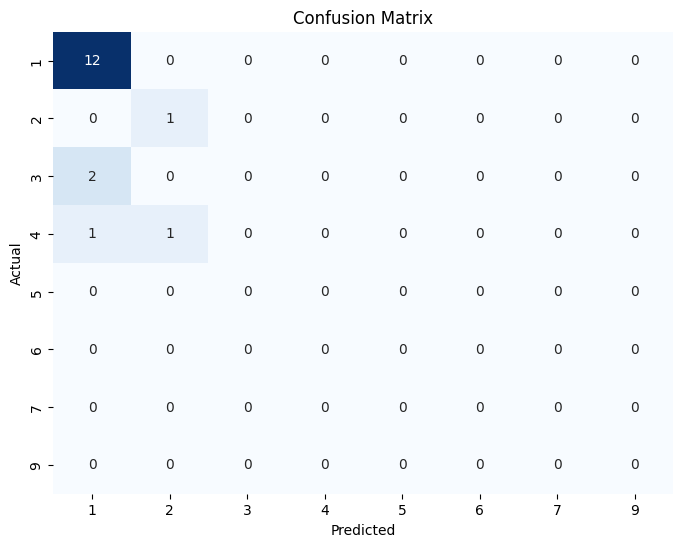

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=10)  # Y adjust the number of estimators as needed

# Train the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)

labels = np.unique(y)
confusion =  confusion_matrix(y_test, y_pred, labels=labels)

# Print the accuracy
print(f'Accuracy of Random Forest classifier: {accuracy * 100:.2f}%')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.71        17
   macro avg       0.32      0.48      0.38        17
weighted avg       0.58      0.71      0.64        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=5)

# Print the cross-validation accuracy for each fold and the mean
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.58823529 0.625      0.625      0.625      0.625     ]
Mean cross-validation accuracy: 0.62


In [ ]:
from matplotlib import pyplot as plt
random_forest.feature_importances_

array([0.01823602, 0.01973587, 0.02995552, 0.011541  , 0.00843051,
       0.02577435, 0.04362913, 0.07676048, 0.00255591, 0.00687472,
       0.00788268, 0.0098952 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00099397, 0.02709717, 0.00562359,
       0.08449492, 0.01650465, 0.02155829, 0.0052339 , 0.01067434,
       0.03068771, 0.00634677, 0.00376585, 0.0093487 , 0.01873466,
       0.00835851, 0.0038148 , 0.02395734, 0.00274384, 0.02059661,
       0.00843262, 0.00846897, 0.00985853, 0.01694493, 0.0089082 ,
       0.00348078, 0.01125957, 0.00595972, 0.01559723, 0.0058669 ,
       0.01826962, 0.01566466, 0.01443215, 0.        , 0.02235559,
       0.00217096, 0.        , 0.01212057, 0.02058221, 0.02147727,
       0.00217096, 0.030935  , 0.04226786, 0.02521142, 0.02030001,
       0.01595921, 0.0396137 , 0.03988433])

Text(0.5, 0, 'Random Forest Feature Importance')

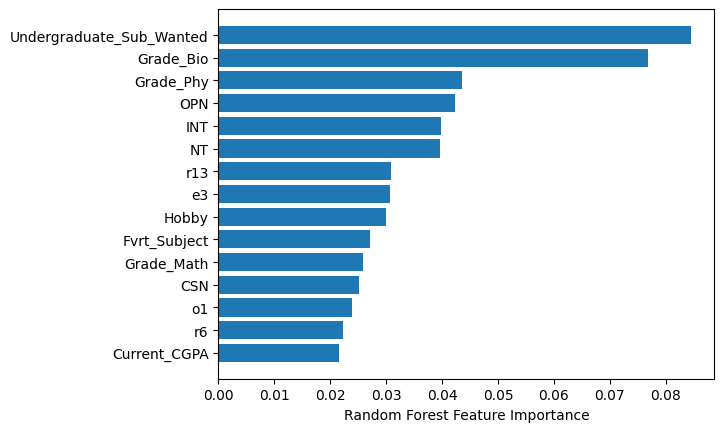

In [ ]:
sorted_idx = random_forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx[-15:]],random_forest.feature_importances_[sorted_idx[-15:]])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
sorted_idx[-10:]

array([18,  2, 25, 56, 61, 62, 57,  6,  7, 20])

In [ ]:
#X.describe()

neural network

In [ ]:
!pip install tensorflow --user

In [ ]:
y.unique().size

8

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2260 - loss: 2.0999 - val_accuracy: 0.6923 - val_loss: 1.8600
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5251 - loss: 1.7949 - val_accuracy: 0.5385 - val_loss: 1.7099
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4509 - loss: 1.8462 - val_accuracy: 0.5385 - val_loss: 1.5798
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5637 - loss: 1.4463 - val_accuracy: 0.5385 - val_loss: 1.5106
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4623 - loss: 1.6894 - val_accuracy: 0.5385 - val_loss: 1.4524
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4812 - loss: 1.4285 - val_accuracy: 0.5385 - val_loss: 1.4062
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4923 - loss: 1.4614 - val_accuracy: 0.5385 - val_loss: 1.3611
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5861 - loss: 1.2132 - val_accuracy: 0.5385 - va

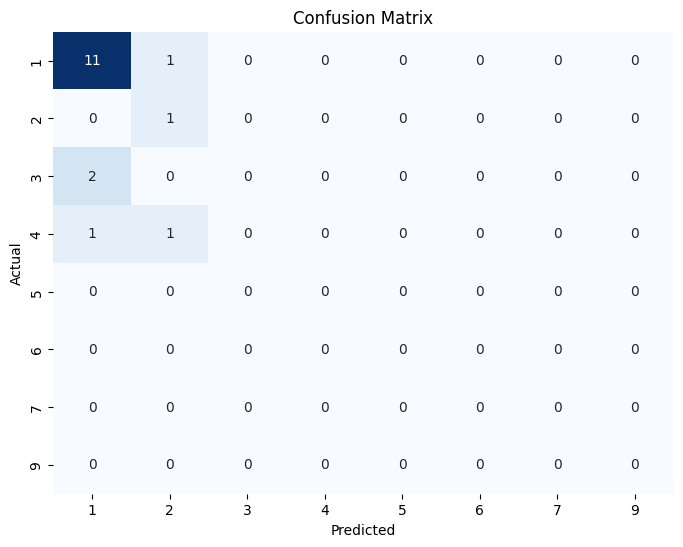

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test
# Labels are in the range from 1 to 9.

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 9 classes (1 to 9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network on the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate the accuracy of the neural network classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the neural network classifier: {accuracy * 100:.2f}%')

# Calculate the confusion matrix
labels = np.unique(y)
confusion =  confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.71        17
   macro avg       0.32      0.48      0.38        17
weighted avg       0.58      0.71      0.64        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Ensure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

kf = KFold(n_splits=5)
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Define and compile the model
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_fold.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=5, verbose=0)

    # Evaluate on test data
    y_pred_fold = np.argmax(model.predict(X_test_fold), axis=-1)
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)

    cv_scores.append(accuracy_fold)

# Cross-validation results
print(f'Cross-validation accuracies: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores):.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Cross-validation accuracies: [0.4117647058823529, 0.5, 0.4375, 0.1875, 0.1875]
Mean cross-validation accuracy: 0.34


In [ ]:
#y_train = y_train -2
#y_test = y_test -2

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2209 - loss: 2.1366 - val_accuracy: 0.5385 - val_loss: 1.7271
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.7667 - val_accuracy: 0.5385 - val_loss: 1.5285
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4711 - loss: 1.7038 - val_accuracy: 0.5385 - val_loss: 1.4097
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5115 - loss: 1.5291 - val_accuracy: 0.5385 - val_loss: 1.3435
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5069 - loss: 1.5026 - val_accuracy: 0.5385 - val_loss: 1.2886
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5246 - loss: 1.5240 - val_accuracy: 0.5385 - val_loss: 1.2797
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5496 - loss: 1.4470 - val_accuracy: 0.6154 - val_loss: 1.2255
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6331 - loss: 1.2835 - val_accuracy: 0.7692 - va

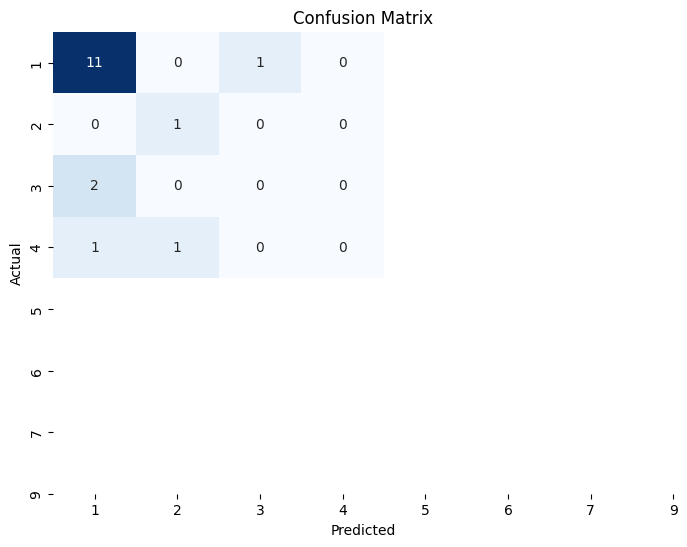

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test
# Labels are in the range from 1 to 9.

# Convert labels to start from 0 (0 to 8) for TensorFlow's categorical cross-entropy


# Manually split the data into training and validation sets
split_ratio = 0.8
split_index = int(len(X_train) * split_ratio)
X_train_split, X_val_split = X_train[:split_index], X_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

# Create TensorFlow datasets for training, validation, and testing
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_split, y_train_split)).shuffle(buffer_size=10000).batch(5)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_split, y_val_split)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)

# Create a simple feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 9 classes (0 to 8)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, verbose=1)

# Evaluate the model on the test data
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=-1)

# Calculate the accuracy of the neural network classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the neural network classifier: {accuracy * 100:.2f}%')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()